# import libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import os
from utils import load_table, select_rename_columns, extract_year, save_table, get_date_range, get_nulls, get_nans



## import the data and quick column print

In [2]:
df = pd.read_csv("cleaned_data\\joined_data.csv", delimiter=',')

#print all columns in df
print(df.columns)

Index(['CalendarMonth', 'PIB_all_industries', 'PIB_construction', 'PIB_energy',
       'PIB_finance_insurance', 'PIB_public_sector', 'PIB_real_estate',
       'PIB_transportation', 'inverstissement_construction', 'CalendarYear',
       'construction_unit_count', 'house_only_price_index',
       'land_only_price_index', 'price_index_total',
       'taux_hypothecaire_terme_5ans', 'Births', 'Deaths', 'Emigrants',
       'Immigrants'],
      dtype='object')


# display df

In [4]:
df

,CalendarMonth,PIB_all_industries,PIB_construction,PIB_energy,PIB_finance_insurance,PIB_public_sector,PIB_real_estate,PIB_transportation,inverstissement_construction,CalendarYear,construction_unit_count,house_only_price_index,land_only_price_index,price_index_total,taux_hypothecaire_terme_5ans,Births,Deaths,Emigrants,Immigrants
0,1997-01,1204015.0,77365.0,103517.0,67302.0,NaN,137687.0,55400.0,NaN,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-02,1211631.0,77934.0,104017.0,68039.0,NaN,137446.0,56001.0,NaN,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-03,1211507.0,77959.0,104637.0,67991.0,NaN,137405.0,56321.0,NaN,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-04,1219735.0,78973.0,105778.0,67894.0,NaN,137247.0,56666.0,NaN,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-05,1224088.0,79937.0,104089.0,68419.0,NaN,137310.0,57128.0,NaN,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2023-08,2201064.0,163953.0,147172.0,157155.0,461762.0,292882.0,91214.0,NaN,2023,NaN,128.1,117.0,125.0,6.17,357903.0,330379.0,94576.0,468817.0
320,2023-09,2200484.0,164288.0,145532.0,156815.0,462571.0,292946.0,91404.0,NaN,2023,NaN,127.8,116.8,124.7,6.27,357903.0,330379.0,94576.0,468817.0
321,2023-10,2201672.0,163725.0,147026.0,157050.0,463230.0,292573.0,91297.0,NaN,2023,NaN,127.6,116.9,124.7,6.42,357903.0,330379.0,94576.0,468817.0
322,2023-11,2205683.0,163047.0,150030.0,156790.0,460454.0,292929.0,92009.0,NaN,2023,NaN,127.2,116.8,124.4,6.47,357903.0,330379.0,94576.0,468817.0


# plot interest rates for prime rate, short term bonds and long term bonds

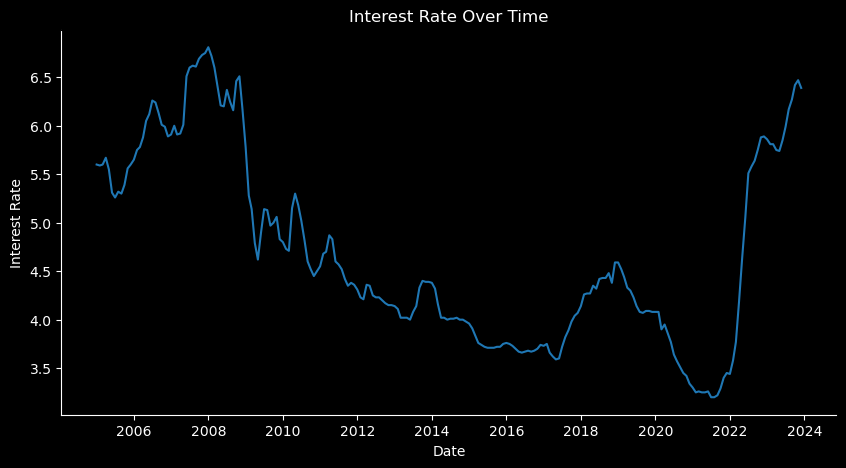

In [14]:
def plot_interest_rate(save=False):
    df_interest_rate = df[['CalendarMonth', 'taux_hypothecaire_terme_5ans']]
    df_interest_rate = df_interest_rate.dropna()
    df_interest_rate = df_interest_rate.sort_values(by='CalendarMonth')
    df_interest_rate['CalendarMonth'] = pd.to_datetime(df_interest_rate['CalendarMonth'])
    df_interest_rate = df_interest_rate.set_index('CalendarMonth')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df_interest_rate.index, df_interest_rate['taux_hypothecaire_terme_5ans'])
    ax.set_title('Interest Rate Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Interest Rate')
    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.title.set_color('white')
    if save == False:
        return plt.show()
    else:
        return plt.savefig('interest_rates.png', dpi=300, bbox_inches='tight')
    
    
plot_interest_rate(save=True)

In [ ]:
def plot_new_price_index_and_rate(save=False):
    df_taux_hypothecaire_terme_5ans = df[['CalendarMonth', 'taux_hypothecaire_terme_5ans']]
    df_taux_hypothecaire_terme_5ans = df_taux_hypothecaire_terme_5ans.dropna().drop_duplicates()
    df_price_index = df[['CalendarMonth', "indice_de_prix_logements"]]
    df_price_index = df_price_index.dropna().groupby('CalendarMonth').mean().reset_index()
    fig, ax1 = plt.subplots()
    fig.patch.set_facecolor('black')
    ax2 = ax1.twinx()
    ax1.plot(df_taux_hypothecaire_terme_5ans['CalendarMonth'], df_taux_hypothecaire_terme_5ans['taux_hypothecaire_terme_5ans'], label='taux hypothecaire terme 5 ans', color='cyan')
    ax2.plot(df_price_index['CalendarMonth'], df_price_index['indice_de_prix_logements'], label='indice de prix logements', color='yellow')
    ax1.set_ylim(0, 10)
    ax2.set_ylim(50, 150)
    ax1.tick_params(axis='y', colors='cyan')
    ax2.tick_params(axis='y', colors='yellow')
    ax1.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='x', colors='white')
    ax2.set_yticklabels(ax2.get_yticks(), color='yellow')
    plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
    ax1.set_facecolor('black')
    ax2.set_facecolor('black')
    ticks = ax1.get_xticks()
    ax1.set_xticks(ticks[::48])
    ax1.set_xticklabels(df_taux_hypothecaire_terme_5ans['CalendarMonth'][::48], rotation=45, color='white')
    ax1.set_xlabel('CalendarMonth', color='white')
    for spine in ax1.spines.values():
        spine.set_edgecolor('white')
    for spine in ax2.spines.values():
        spine.set_edgecolor('white')
    if save == False:
        return plt.show()
    else:
        return plt.savefig('interest_rates.png', dpi=300, bbox_inches='tight')

plot_new_price_index_and_rate()

In [ ]:
def plot_inv_and_rate(save=False):
    df_taux_hypothecaire_terme_5ans = df[['CalendarMonth', 'taux_hypothecaire_terme_5ans']]
    df_taux_hypothecaire_terme_5ans = df_taux_hypothecaire_terme_5ans.dropna().drop_duplicates()
    df_taux_hypothecaire_terme_5ans = df_taux_hypothecaire_terme_5ans[df_taux_hypothecaire_terme_5ans['CalendarMonth'] >= '2017-01']
    df_inv = df[["CalendarMonth", "inverstissement_construction"]]
    df_inv = df_inv.dropna().groupby('CalendarMonth').mean().reset_index()

    fig, ax1 = plt.subplots()

    fig.patch.set_facecolor('black')  # set background color to black
    ax1.set_facecolor('black')  # set the plot area background color to black

    color = 'tab:blue'
    ax1.set_xlabel('CalendarMonth', color='white')
    ax1.set_ylabel('taux hypothecaire terme 5 ans', color='white')
    ax1.plot(df_taux_hypothecaire_terme_5ans['CalendarMonth'], df_taux_hypothecaire_terme_5ans['taux_hypothecaire_terme_5ans'], color=color)
    ax1.tick_params(axis='y', labelcolor='white')
    ax1.set_ylim([0,10])  # set y scale for taux_hypothecaire_terme_5ans

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('inverstissement construction', color='white')  # we already handled the x-label with ax1
    ax2.plot(df_inv['CalendarMonth'], df_inv['inverstissement_construction'], color=color)
    ax2.tick_params(axis='y', labelcolor='white')

    ax1.spines['bottom'].set_color('white')
    ax1.spines['top'].set_color('white') 
    ax1.spines['right'].set_color('white')
    ax1.spines['left'].set_color('white')

    ax2.spines['bottom'].set_color('white')
    ax2.spines['top'].set_color('white') 
    ax2.spines['right'].set_color('white')
    ax2.spines['left'].set_color('white')

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(12))  # set x ticks to appear every 12 months
    ax1.tick_params(axis='x', colors='white')  # set x tick labels to white

    fig.tight_layout(rect=[0, 0.03, 1, 1])  # adjust the bottom margin
    if save == False:
        return plt.show()
    else:
        return plt.savefig('interest_rates.png', dpi=300, bbox_inches='tight')
    
plot_inv_and_rate()

In [ ]:
# from df, 


In [ ]:
test_df = load_table("data\stats_can\investissement_construction.csv", delimiter=";")
#print all unique values in GÉO, Type de structure, Type de travaux
# print(test_df['Type de structure'].unique())
# print(test_df['Type de travaux'].unique())
#get the count the number of records by "PÉRIODE DE RÉFÉRENCE" and "Type de travaux"
# print(test_df.groupby(["PÉRIODE DE RÉFÉRENCE", "Type de structure", "Type de travaux"]).size())
# print(test_df)
# i want to create a feature wich is the avergae of all values for all "type de travaux" and "type de structure" for each "PÉRIODE DE RÉFÉRENCE"
test_df["avg_agg_investment"] = test_df.groupby(["PÉRIODE DE RÉFÉRENCE"])["VALEUR"].transform('mean')
print(test_df.head())
